In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dfo=pd.read_excel(r'C:\Users\leer\Downloads\income.xlsx')

In [3]:
dfo.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


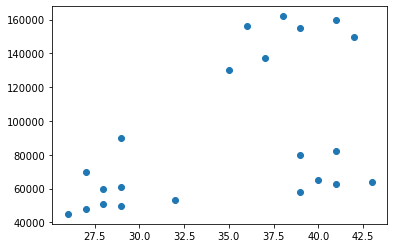

In [4]:
plt.scatter(dfo['Age'],dfo['Income($)'])

In [5]:
km =KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_pred=km.fit_predict(dfo[['Age','Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [7]:
dfo['cluster']=y_pred
dfo.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


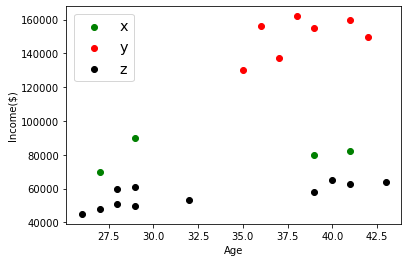

In [9]:
df1=dfo[dfo.cluster==0]
df2=dfo[dfo.cluster==1]
df3=dfo[dfo.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],label='x',color='green')
plt.scatter(df2['Age'],df2['Income($)'],label='y',color='red')
plt.scatter(df3['Age'],df3['Income($)'],label='z',color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(fontsize="x-large")

In [10]:
ic=dfo['Income($)'].values.reshape(-1,1)
icdf=pd.DataFrame(ic)
age=dfo['Age'].values.reshape(-1,1)
agedf=pd.DataFrame(age)

In [13]:
scaler=MinMaxScaler()
scaler.fit(icdf)
dfo['Income($)']=scaler.transform(icdf)
scaler.fit(agedf)
dfo['Age']=scaler.transform(agedf)
dfo

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [14]:
km =KMeans(n_clusters=3)
y_pred=km.fit_predict(dfo[['Age','Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [15]:
dfo['clusters']=y_pred
dfo.drop('cluster',axis='columns',inplace=True)
dfo

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [16]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

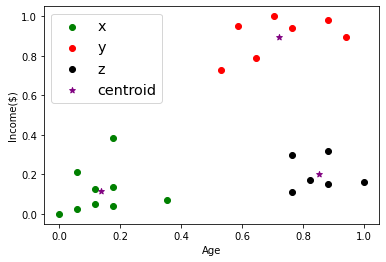

In [18]:
df1=dfo[dfo.clusters==0]
df2=dfo[dfo.clusters==1]
df3=dfo[dfo.clusters==2]

plt.scatter(df1['Age'],df1['Income($)'],label='x',color='green')
plt.scatter(df2['Age'],df2['Income($)'],label='y',color='red')
plt.scatter(df3['Age'],df3['Income($)'],label='z',color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(fontsize="x-large")

In [24]:
dff=pd.read_excel(r'C:\Users\leer\Downloads\income.xlsx')

In [25]:
dff['clusters']=y_pred
df2

,Name,Age,Income($),clusters
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1
10,Donald,37,137000,1


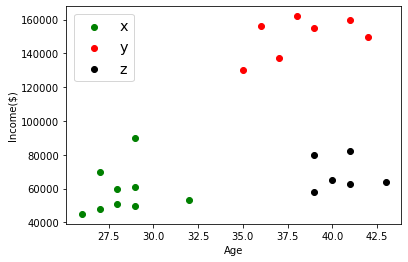

In [26]:
df1=dff[dff.clusters==0]
df2=dff[dff.clusters==1]
df3=dff[dff.clusters==2]

plt.scatter(df1['Age'],df1['Income($)'],label='x',color='green')
plt.scatter(df2['Age'],df2['Income($)'],label='y',color='red')
plt.scatter(df3['Age'],df3['Income($)'],label='z',color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(fontsize="x-large")

In [28]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(dfo[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\leer\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009398,
 0.1735559655531264,
 0.13265419827245162,
 0.10383752586603562]

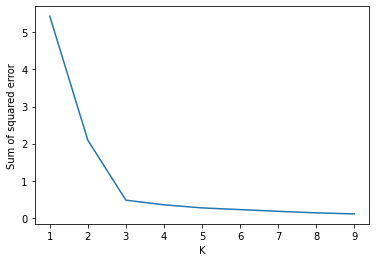

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)